<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EVALUACION/VELEZ_DIETHMAR_EVA_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Análisis y Preparación de Datos**

> Añadir blockquote



In [1]:
#1 IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [7]:

# 2 CARGAR  Y UNIR LOS DATASETS

df1 = pd.read_csv('/content/index_1.csv')
df2 = pd.read_csv('/content/index_2.csv')

df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

print("Columnas df1:", df1.columns.tolist())
print("Columnas df2:", df2.columns.tolist())


Columnas df1: ['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name']
Columnas df2: ['date', 'datetime', 'cash_type', 'money', 'coffee_name']


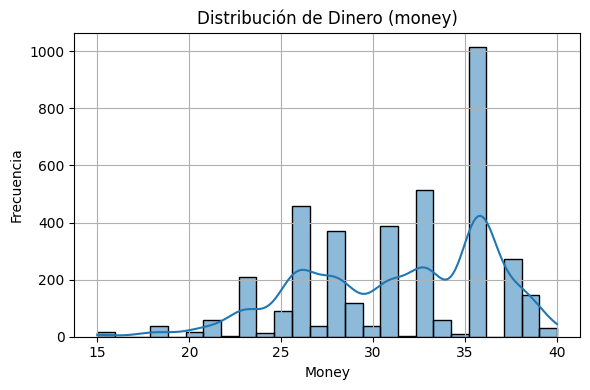

In [11]:

# 2. Realizar Análisis Exploratorio de Datos (EDA) utilizando visualizaciones para entender los patrones.

#=============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la variable 'money'
if 'money' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df['money'], kde=True)
    plt.title('Distribución de Dinero (money)')
    plt.xlabel('Money')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'money' no está disponible en el DataFrame.")


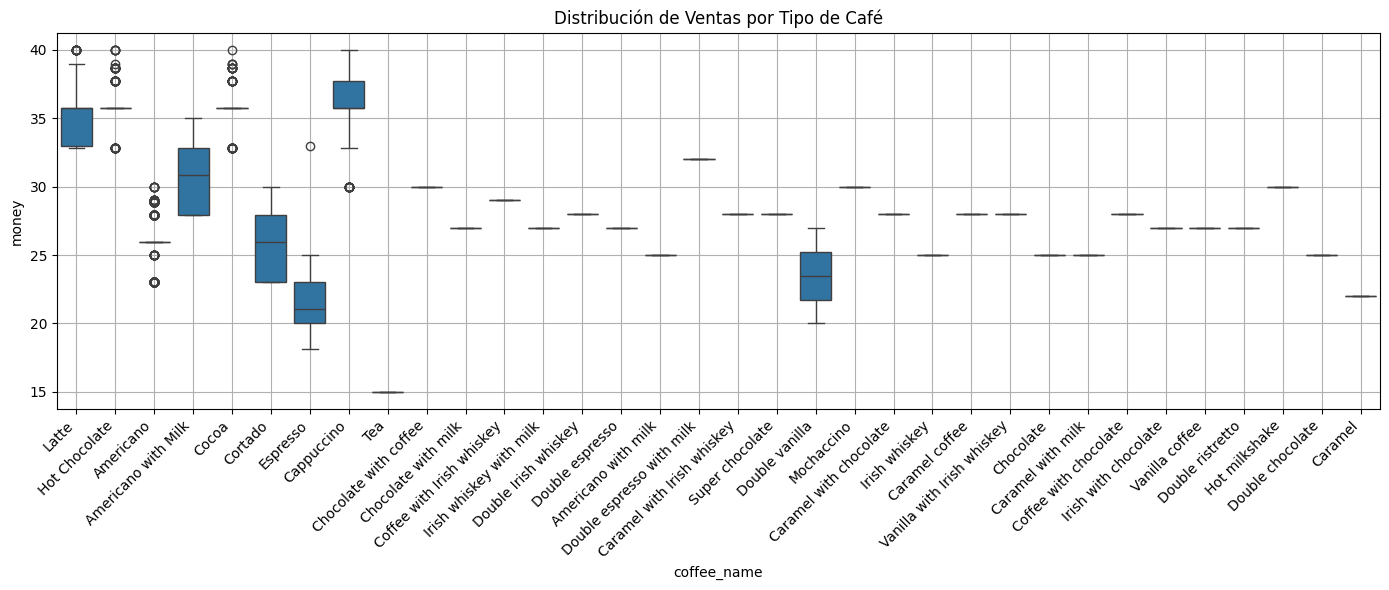

In [12]:
# Boxplot por tipo de café
if 'coffee_name' in df.columns and 'money' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df, x='coffee_name', y='money')
    plt.title('Distribución de Ventas por Tipo de Café')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Columnas 'coffee_name' y/o 'money' no disponibles para boxplot.")


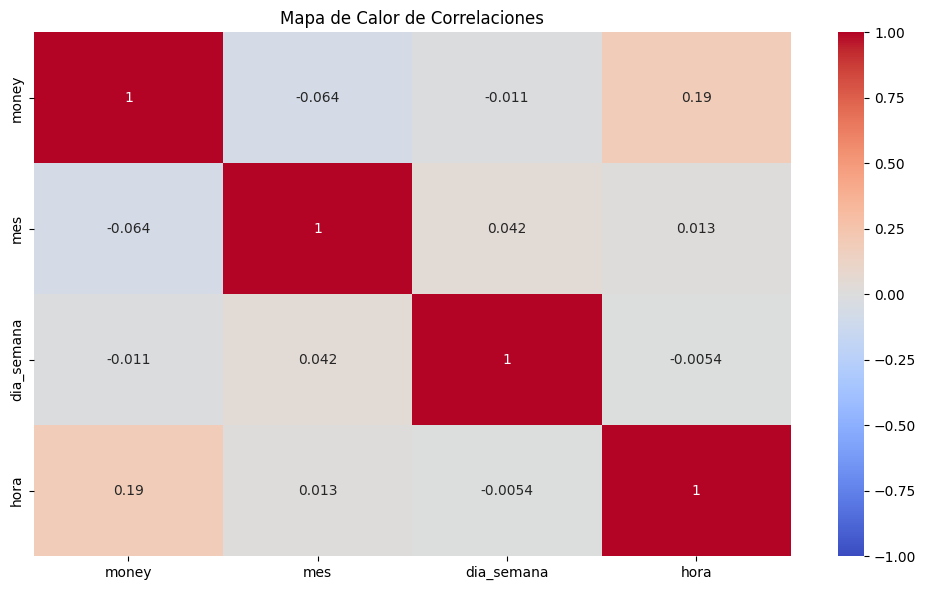

In [13]:
import pandas as pd

# Crear variables adicionales si no existen (útil para EDA)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['mes'] = df['datetime'].dt.month
df['dia_semana'] = df['datetime'].dt.weekday
df['hora'] = df['datetime'].dt.hour

# Convertir columnas categóricas a numéricas si existen
for col in ['feriado', 'promocion', 'evento_local']:
    if col in df.columns:
        df[col] = df[col].astype(int)

# Mapa de calor de correlaciones
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])

if columnas_numericas.shape[1] > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(columnas_numericas.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Mapa de Calor de Correlaciones')
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes columnas numéricas para generar un mapa de calor.")


In [21]:
#3 Ingeniería de Características: Extraer mes, día de la semana, hora del datetime.
#--Crear cantidad_total_vendida_no_dia (suma de money por día). Codificar variables categóricas (e.g., One-Hot Encoding).

#=============================================================================
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Extraer características temporales
df['mes'] = df['datetime'].dt.month
df['dia_semana'] = df['datetime'].dt.dayofweek  # 0 = lunes, 6 = domingo
df['hora'] = df['datetime'].dt.hour
df

,date,datetime,cash_type,card,money,coffee_name,mes,dia_semana,hora,fecha,...,coffee_name_Hot milkshake,coffee_name_Irish whiskey,coffee_name_Irish whiskey with milk,coffee_name_Irish with chocolate,coffee_name_Latte,coffee_name_Mochaccino,coffee_name_Super chocolate,coffee_name_Tea,coffee_name_Vanilla coffee,coffee_name_Vanilla with Irish whiskey
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3.0,4.0,10.0,2024-03-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3.0,4.0,12.0,2024-03-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3.0,4.0,12.0,2024-03-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3.0,4.0,13.0,2024-03-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3.0,4.0,13.0,2024-03-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2025-03-23,NaT,cash,NaN,30.0,Cappuccino,NaN,NaN,NaN,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3894,2025-03-23,NaT,card,NaN,25.0,Irish whiskey,NaN,NaN,NaN,NaT,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3895,2025-03-23,NaT,card,NaN,28.0,Super chocolate,NaN,NaN,NaN,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3896,2025-03-23,NaT,card,NaN,28.0,Vanilla with Irish whiskey,NaN,NaN,NaN,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
# Asegurarse de que 'datetime' sea tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Extraer mes, día de la semana y hora
df['mes'] = df['datetime'].dt.month
df['dia_semana'] = df['datetime'].dt.dayofweek  # 0 = lunes
df['hora'] = df['datetime'].dt.hour

# Crear columna de solo fecha (sin hora)
df['fecha'] = df['datetime'].dt.date

# Agrupar por fecha y sumar 'money'
ventas_por_dia = df.groupby('fecha')['money'].sum().reset_index()
ventas_por_dia.rename(columns={'money': 'cantidad_total_vendida_no_dia'}, inplace=True)

# Unir al DataFrame original sin duplicar columnas
df = df.drop(columns=['cantidad_total_vendida_no_dia'], errors='ignore')  # Por si ya existía
df = df.merge(ventas_por_dia, on='fecha', how='left')

df.head()



,date,datetime,cash_type,card,money,coffee_name,mes,dia_semana,hora,fecha,...,coffee_name_Irish whiskey,coffee_name_Irish whiskey with milk,coffee_name_Irish with chocolate,coffee_name_Latte,coffee_name_Mochaccino,coffee_name_Super chocolate,coffee_name_Tea,coffee_name_Vanilla coffee,coffee_name_Vanilla with Irish whiskey,cantidad_total_vendida_no_dia
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3.0,4.0,10.0,2024-03-01,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,396.3
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3.0,4.0,12.0,2024-03-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,396.3
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3.0,4.0,12.0,2024-03-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,396.3
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3.0,4.0,13.0,2024-03-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,396.3
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3.0,4.0,13.0,2024-03-01,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,396.3


In [23]:
# Codificación One-Hot de columnas categóricas
df_codificado = pd.get_dummies(df, columns=['coffee_name'], drop_first=True)
#  ver las nuevas columnas
print(df_codificado.columns)


Index(['date', 'datetime', 'cash_type', 'card', 'money', 'mes', 'dia_semana',
       'hora', 'fecha', 'cantidad_total_vendida_por_dia',
       'coffee_name_Americano', 'coffee_name_Americano with Milk',
       'coffee_name_Americano with milk', 'coffee_name_Cappuccino',
       'coffee_name_Caramel', 'coffee_name_Caramel coffee',
       'coffee_name_Caramel with Irish whiskey',
       'coffee_name_Caramel with chocolate', 'coffee_name_Caramel with milk',
       'coffee_name_Chocolate', 'coffee_name_Chocolate with coffee',
       'coffee_name_Chocolate with milk', 'coffee_name_Cocoa',
       'coffee_name_Coffee with Irish whiskey',
       'coffee_name_Coffee with chocolate', 'coffee_name_Cortado',
       'coffee_name_Double Irish whiskey', 'coffee_name_Double chocolate',
       'coffee_name_Double espresso', 'coffee_name_Double espresso with milk',
       'coffee_name_Double ristretto', 'coffee_name_Double vanilla',
       'coffee_name_Espresso', 'coffee_name_Hot Chocolate',
       'coff

In [24]:
#4 Dividir los datos en conjuntos de entrenamiento y prueba.

#=============================================================================

from sklearn.model_selection import train_test_split

# Variables independientes (X) y dependiente (y)
X = df[['mes', 'dia_semana', 'hora']]
y = df['cantidad_total_vendida_no_dia']

# División en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las formas de los conjuntos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (3118, 3)
Tamaño de X_test: (780, 3)
Tamaño de y_train: (3118,)
Tamaño de y_test: (780,)


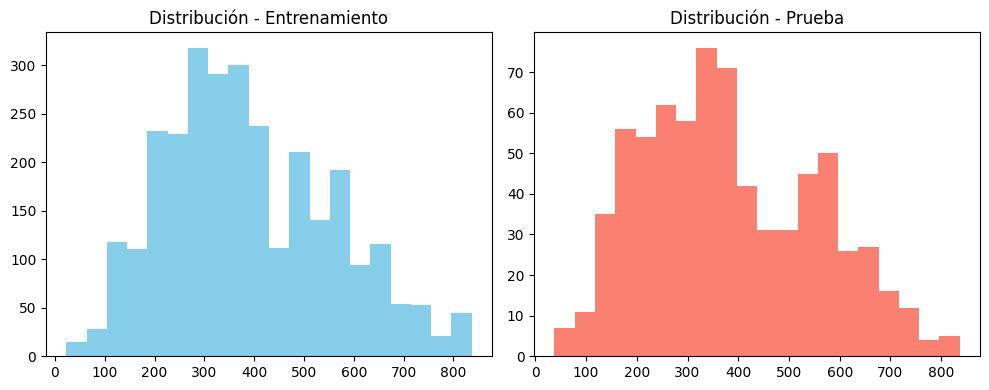

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=20, color='skyblue')
plt.title('Distribución - Entrenamiento')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=20, color='salmon')
plt.title('Distribución - Prueba')

plt.tight_layout()
plt.show()


## **2. Modelado Predictivo (con TensorFlow Keras)**

In [29]:
print(df.columns)


Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'mes',
       'dia_semana', 'hora', 'fecha', 'cantidad_total_vendida_por_dia',
       'coffee_name_Americano', 'coffee_name_Americano with Milk',
       'coffee_name_Americano with milk', 'coffee_name_Cappuccino',
       'coffee_name_Caramel', 'coffee_name_Caramel coffee',
       'coffee_name_Caramel with Irish whiskey',
       'coffee_name_Caramel with chocolate', 'coffee_name_Caramel with milk',
       'coffee_name_Chocolate', 'coffee_name_Chocolate with coffee',
       'coffee_name_Chocolate with milk', 'coffee_name_Cocoa',
       'coffee_name_Coffee with Irish whiskey',
       'coffee_name_Coffee with chocolate', 'coffee_name_Cortado',
       'coffee_name_Double Irish whiskey', 'coffee_name_Double chocolate',
       'coffee_name_Double espresso', 'coffee_name_Double espresso with milk',
       'coffee_name_Double ristretto', 'coffee_name_Double vanilla',
       'coffee_name_Espresso', 'coffee_name_Hot Chocolate

In [31]:
# 1    Construir y entrenar un modelo de red neuronal (utilizando TensorFlow Keras)
# para prever la cantidad_total_vendida_no_dia.


#=================================

# Agrupar por fecha y sumar la columna 'money'
df_total = df.groupby('fecha').agg({
    'money': 'sum'
}).reset_index()

# Renombrar la columna de dinero
df_total.rename(columns={'money': 'cantidad_total_vendida_no_dia'}, inplace=True)

print(df_total.head())


        fecha  cantidad_total_vendida_no_dia
0  2024-03-01                          396.3
1  2024-03-02                          228.1
2  2024-03-03                          349.1
3  2024-03-04                          135.2
4  2024-03-05                          338.5


In [56]:
# Comprobar si hay NaN o Inf
print("NaN en X_train:", X_train.isnull().sum().sum())
print("NaN en y_train:", y_train.isnull().sum())
print("Inf en X_train:", np.isinf(X_train).sum().sum())

# Eliminar cualquier fila con NaN o Inf
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
y_test = y_test.loc[X_test.index]


NaN en X_train: 0
NaN en y_train: 0
Inf en X_train: 0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir X y y
X = df_model[['mes', 'dia_semana', 'hora']]
y = df_model['cantidad_total_vendida_no_dia']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


mes           201
dia_semana    201
hora          201
dtype: int64
201


In [59]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Crear el modelo
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Salida continua (regresión)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')


In [60]:

# Entrenar
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 95870.4922 - val_loss: 30580.7793
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 27035.6348 - val_loss: 27938.7734
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26310.2637 - val_loss: 27907.2246
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 27596.5352 - val_loss: 28478.5410
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 28665.5938 - val_loss: 28034.7949
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26568.1797 - val_loss: 28228.6836
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 26519.2871 - val_loss: 28063.9922
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27005.2383 - val_loss: 27585.8418
Epoch 9/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27018.1348 - val_loss: 27666.1465
Epoch 10/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25850.0391 - val_loss: 27706.6055
Epoch 11/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [61]:
# Evaluar en conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Pérdida (loss) en conjunto de prueba: {loss:.2f}')


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24610.8340
Pérdida (loss) en conjunto de prueba: 26988.39


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


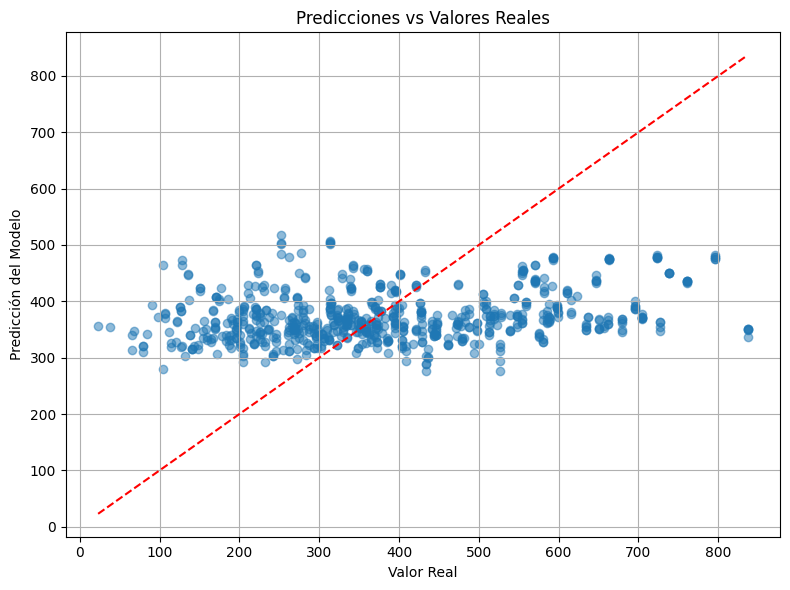

In [63]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Obtener predicciones del modelo
y_pred = model.predict(X_test_scaled).flatten()

# Graficar predicciones vs reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valor Real')
plt.ylabel('Predicción del Modelo')
plt.title('Predicciones vs Valores Reales')
plt.grid(True)
plt.tight_layout()
plt.show()


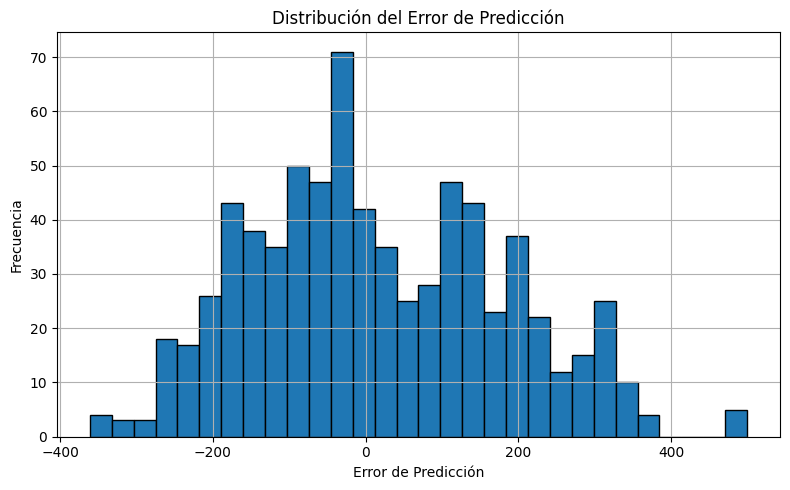

In [64]:
# CALCULAR ERROR DE PREDICCION
errores = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(errores, bins=30, edgecolor='black')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución del Error de Predicción')
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:

# 3 Construir y entrenar otro modelo (con TensorFlow Keras) para prever la cantidad_vendida por coffee_name (o un enfoque multi-output).


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Asegúrate de que las siguientes columnas estén en tu DataFrame
# 'mes', 'dia_semana', 'hora', 'coffee_name', 'money'

# Eliminar valores nulos por seguridad
df = df.dropna(subset=['mes', 'dia_semana', 'hora', 'coffee_name', 'money'])

# Codificar coffee_name (One-Hot)
encoder = OneHotEncoder(sparse_output=False)

encoder = OneHotEncoder(sparse_output=False)  # <- aquí está el cambio
coffee_encoded = encoder.fit_transform(df[['coffee_name']])
coffee_encoded_df = pd.DataFrame(coffee_encoded, columns=encoder.get_feature_names_out(['coffee_name']))
df_encoded = pd.concat([df.reset_index(drop=True), coffee_encoded_df], axis=1)

# Variables de entrada
features = ['mes', 'dia_semana', 'hora'] + list(coffee_encoded_df.columns)
X = df_encoded[features]

# Variable de salida (target)
y = df_encoded['money']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [68]:

# Agrupar por fecha y coffee_name para obtener la cantidad vendida (sumando money)
ventas_cafe = df.groupby(['fecha', 'coffee_name'])['money'].sum().reset_index()

# Pivotear para que cada coffee_name sea una columna (multi-output)
ventas_pivot = ventas_cafe.pivot(index='fecha', columns='coffee_name', values='money').fillna(0)

ventas_pivot.head()


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
fecha,,,,,,,,
2024-03-01,28.9,135.2,0.0,38.7,0.0,0.0,116.1,77.4
2024-03-02,86.7,101.4,0.0,0.0,0.0,0.0,0.0,40.0
2024-03-03,28.9,67.6,0.0,38.7,57.8,0.0,77.4,78.7
2024-03-04,0.0,33.8,0.0,0.0,0.0,24.0,0.0,77.4
2024-03-05,0.0,0.0,0.0,38.7,28.9,0.0,154.8,116.1


In [69]:
# Unir variables temporales a las fechas de ventas
features = df[['fecha', 'mes', 'dia_semana', 'hora']].drop_duplicates(subset='fecha')
data = pd.merge(features, ventas_pivot, on='fecha', how='inner')

# Separar variables
X = data[['mes', 'dia_semana', 'hora']]
y = data.drop(columns=['fecha', 'mes', 'dia_semana', 'hora'])  # multi-output target

# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Número de salidas = número de columnas en y (tipos de café)
output_dim = y.shape[1]

# Construcción del modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(output_dim))  # Salida multi-output

# Compilación
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Entrenamiento
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3874.0789 - val_loss: 2355.2776
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2005.2689 - val_loss: 2027.0902
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1679.8237 - val_loss: 1951.4521
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1774.1729 - val_loss: 1942.9832
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1731.3920 - val_loss: 1932.7648
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1686.7067 - val_loss: 1923.7106
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1862.4254 - val_loss: 1917.9062
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1837.7253 - val_loss: 1917.2939
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1761.7273 - val_loss: 1907.5780
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1627.2767 - val_loss: 1909.6486
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1750.8683 - val_loss: 1894.3049
Epoc

In [71]:
# Evaluar la pérdida global
loss = model.evaluate(X_test_scaled, y_test)
print(f'Pérdida en conjunto de prueba: {loss:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1744.4028 
Pérdida en conjunto de prueba: 1657.23


In [78]:
# Obtener predicciones
y_pred = model.predict(X_test_scaled)

# Convertir a DataFrame para comparar más fácilmente
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns, index=y_test.index)



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


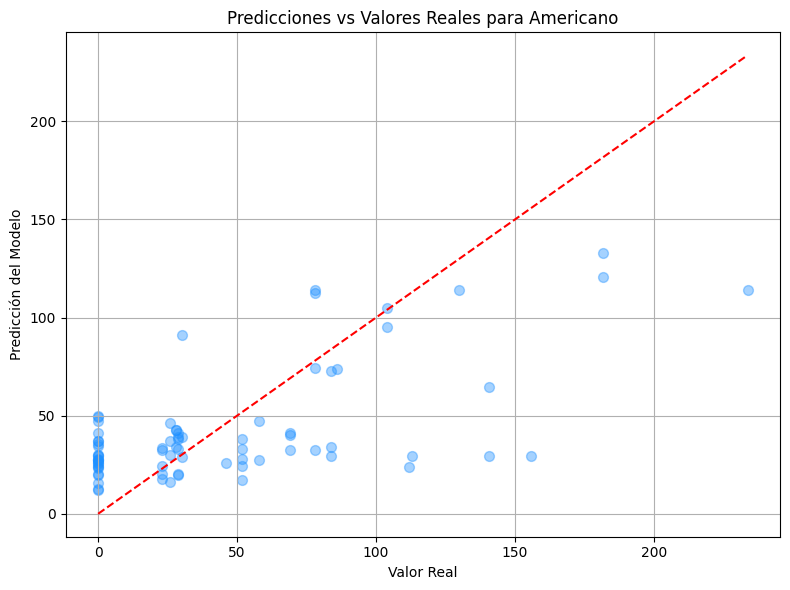

In [79]:
import matplotlib.pyplot as plt

# Seleccionar un tipo de café (columna)
coffee_col = y_test.columns[0]  # Ej: 'coffee_name_A'

# Datos reales y predichos
y_real = y_test[coffee_col].values
y_pred = y_pred_df[coffee_col].values

# Gráfico
plt.figure(figsize=(8, 6))
plt.scatter(y_real, y_pred, s=50, alpha=0.4, color='dodgerblue')  # burbujas
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--')  # línea ideal

plt.title(f'Predicciones vs Valores Reales para {coffee_col}')
plt.xlabel('Valor Real')
plt.ylabel('Predicción del Modelo')
plt.grid(True)
plt.tight_layout()
plt.show()


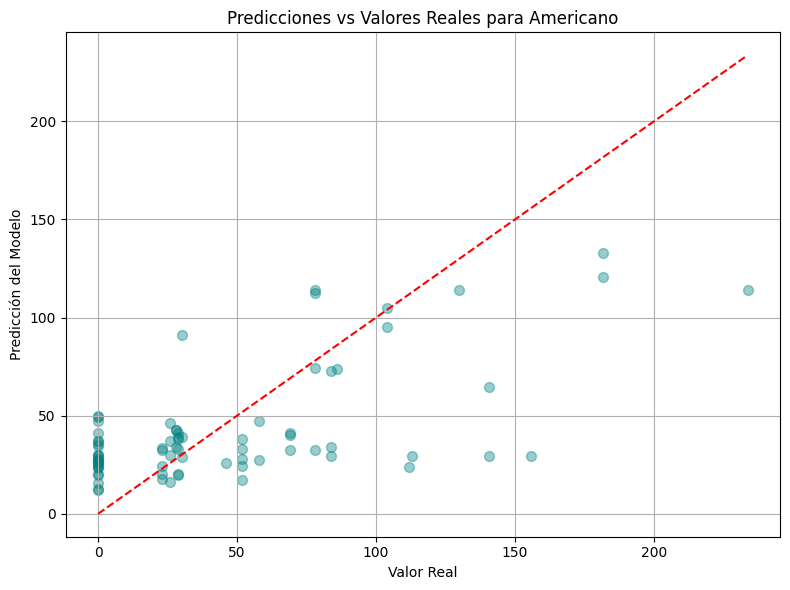

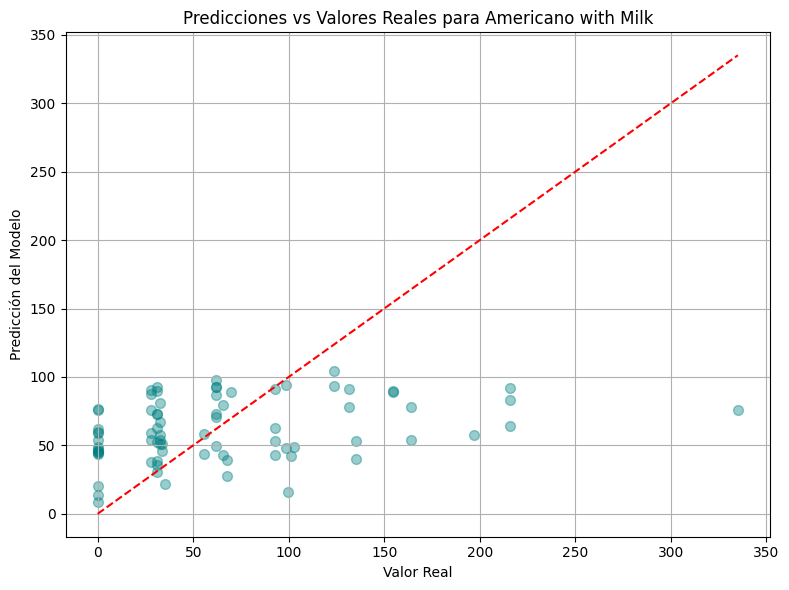

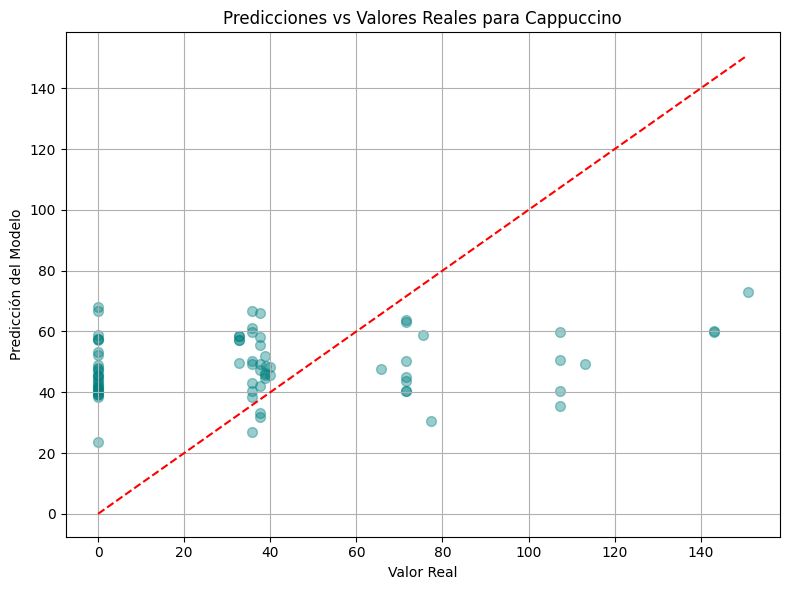

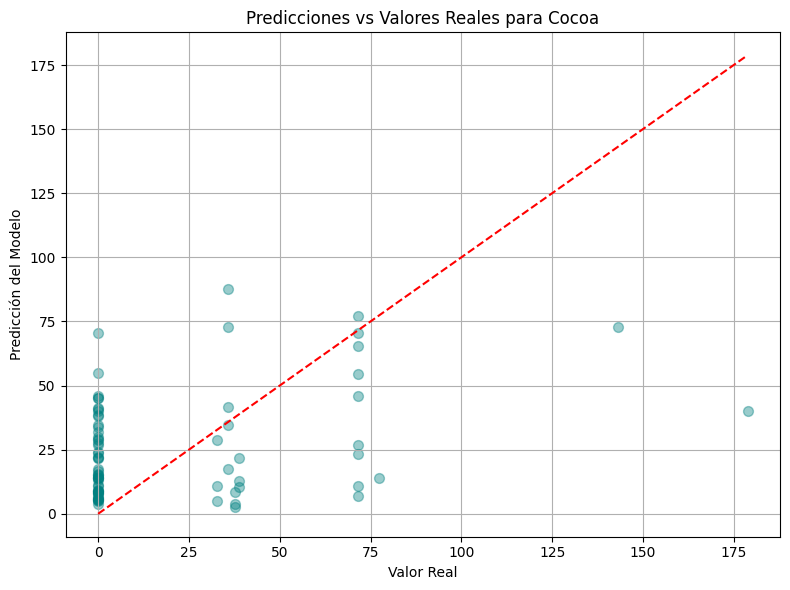

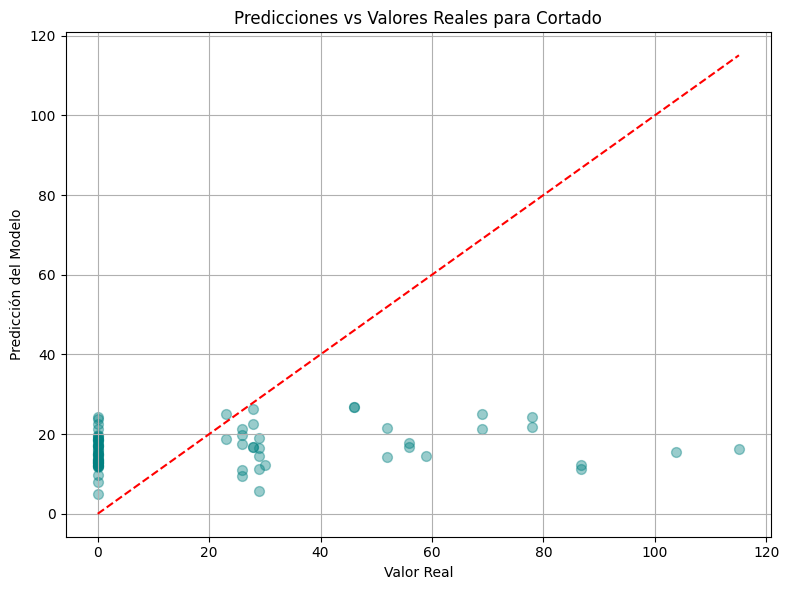

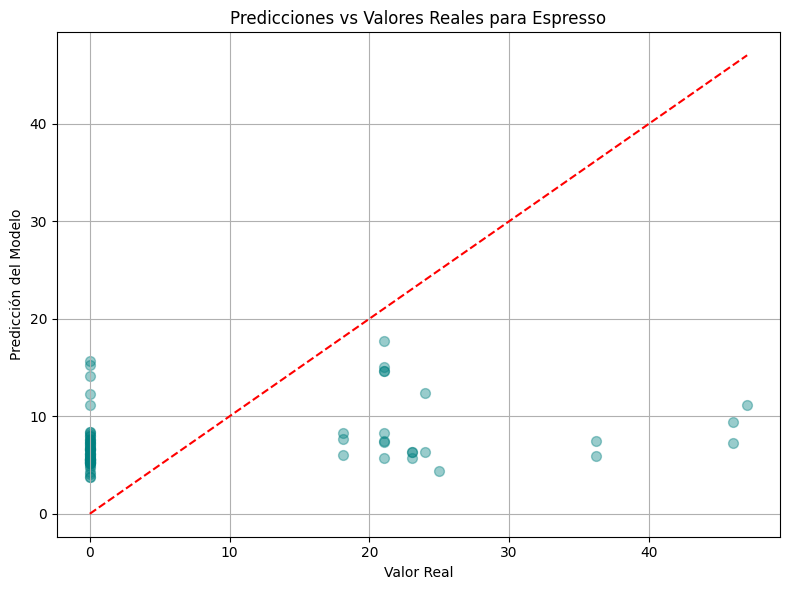

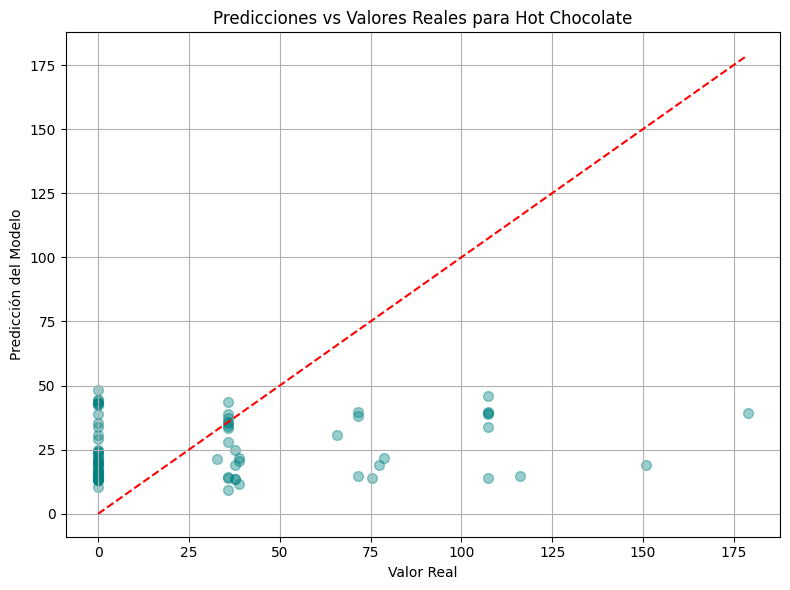

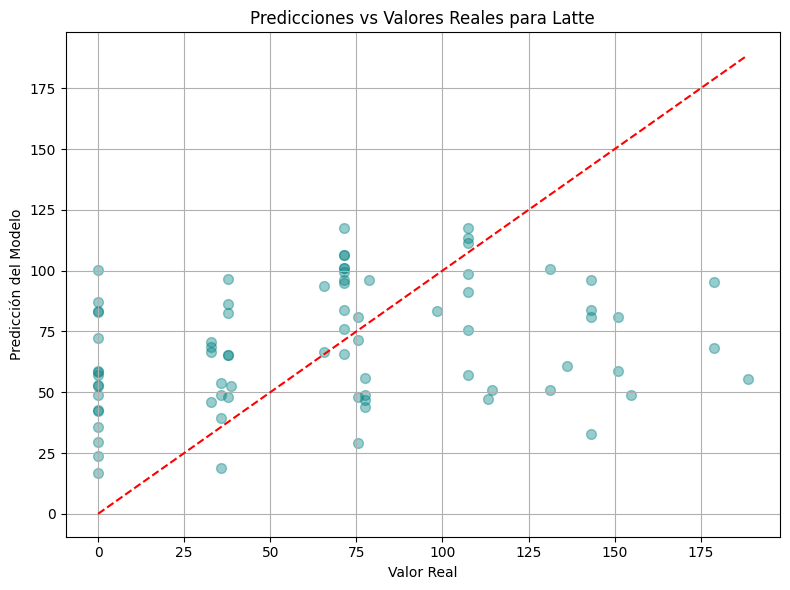

In [80]:
# Mostrar todos los tipos de café
for coffee_col in y_test.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[coffee_col], y_pred_df[coffee_col], s=50, alpha=0.4, color='teal')
    plt.plot([y_test[coffee_col].min(), y_test[coffee_col].max()],
             [y_test[coffee_col].min(), y_test[coffee_col].max()], 'r--')
    plt.title(f'Predicciones vs Valores Reales para {coffee_col}')
    plt.xlabel('Valor Real')
    plt.ylabel('Predicción del Modelo')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [82]:
# Crear un DataFrame para guardar los resultados
metrics_df = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R2'])

# Calcular para cada tipo de café
for coffee_col in y_test.columns:
    y_true = y_test[coffee_col]
    y_pred_col = y_pred_df[coffee_col]

    mae = mean_absolute_error(y_true, y_pred_col)
    mse = mean_squared_error(y_true, y_pred_col)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred_col)

    metrics_df.loc[coffee_col] = [mae, mse, rmse, r2]


In [83]:
# Crear un DataFrame para guardar los resultados
metrics_df = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R2'])

# Calcular para cada tipo de café
for coffee_col in y_test.columns:
    y_true = y_test[coffee_col]
    y_pred_col = y_pred_df[coffee_col]

    mae = mean_absolute_error(y_true, y_pred_col)
    mse = mean_squared_error(y_true, y_pred_col)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred_col)

    metrics_df.loc[coffee_col] = [mae, mse, rmse, r2]


In [84]:
# Ver todas las métricas
print(metrics_df)


                           MAE          MSE       RMSE        R2
Americano            29.309004  1530.510690  39.121742  0.408158
Americano with Milk  46.285216  3778.649813  61.470723  0.100980
Cappuccino           33.690102  1576.730416  39.708065 -0.061333
Cocoa                25.758138  1135.950286  33.703862  0.045781
Cortado              21.293752   791.543117  28.134376  0.030952
Espresso              9.818504   152.761517  12.359673  0.070948
Hot Chocolate        31.124036  1688.887895  41.096081  0.013022
Latte                41.514159  2602.842476  51.018060  0.028836


In [85]:
print("Métricas promedio en todos los tipos de café:")
print(metrics_df.mean())


Métricas promedio en todos los tipos de café:
MAE       29.849114
MSE     1657.234526
RMSE      38.326573
R2         0.079668
dtype: float64


# 3. Serialización del Modelo

In [87]:
model.save('modelo_multioutput.keras')



In [88]:
from tensorflow.keras.models import load_model

modelo_cargado = load_model('modelo_multioutput.keras')


In [89]:
import joblib

# Guardar scaler y encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')


['encoder.pkl']

In [90]:
scaler = joblib.load('scaler.pkl')
encoder = joblib.load('encoder.pkl')
